## Heart disease data analysis
Inspiration: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter7.html#an-overview-of-ensemble-methods


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = np.load('All_heart_data.npy', allow_pickle=True)
print(y_train.shape, y_test.shape)
# random forest (decision trees)
# bagging aka. bootstrap aggregation lect notes 10
# confusion matrix to see patterns in misclassifications
# gini index to evaluate feature importance

#seed = 0
#random.seed(seed); np.random.seed(seed)

import warnings
warnings.filterwarnings('ignore') 

(237, 1) (60, 1)


In [22]:
#scaling
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, max_depth=None, criterion='entropy')

clf.fit(X_train, y_train.ravel())
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy random forest:", metrics.accuracy_score(y_test, y_pred))
# Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy random forest: 0.85
Test set accuracy with Logistic Regression: 0.87


###### Boosting

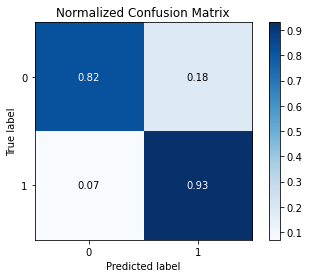

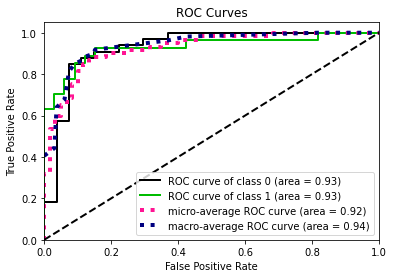

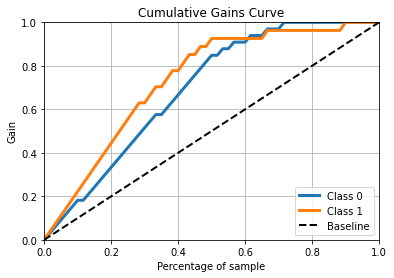

In [26]:
from sklearn.ensemble import AdaBoostClassifier
import scikitplot as skplt

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, criterion='entropy'), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

The confusion matrix tells us that 93% of predicted heart diseases correspond with the target, and 82% of predicted healthy hearts.

In [27]:
print(f'Overall accuracy with Ada boosted Random Forest: {metrics.accuracy_score(y_test, y_pred)}')

Overall accuracy with Ada boosted Random Forest: 0.8666666666666667
